# Importing libraries

In [29]:
import pandas as pd
import seaborn as sns

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Context

# Loading Dataset

In [31]:
#Loading the dataset
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


In [32]:
#Understanding the data types of each field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025_rank                       1503 non-null   string 
 1   2024_rank                       1482 non-null   string 
 2   institution_name                1503 non-null   string 
 3   location                        1503 non-null   string 
 4   location_full                   1503 non-null   string 
 5   size                            1503 non-null   string 
 6   academic_reputation             1503 non-null   Float64
 7   employer_reputation             1503 non-null   Float64
 8   faculty_student                 1503 non-null   Float64
 9   citations_per_faculty           1503 non-null   Float64
 10  international_faculty           1403 non-null   Float64
 11  international_students          1445 non-null   Float64
 12  international_research_network  15

In [33]:
#Number of rows and columns
df.shape

(1503, 16)

In [34]:
#Understanding some basic metrics of the data
df.describe()

,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability
count,1503.0,1503.0,1503.0,1503.0,1403.0,1445.0,1502.0,1503.0,1484.0
mean,20.28656,19.786693,28.128676,23.50346,30.725374,25.580346,50.129095,23.825083,24.309299
std,22.32623,23.784986,27.613017,27.870692,34.328935,31.098689,29.866588,27.351315,31.074718
min,1.3,1.1,1.0,1.0,1.0,1.0,1.0,1.2,1.0
25%,6.3,4.3,7.3,2.8,4.2,2.9,22.725,4.0,1.3
50%,11.0,9.4,16.0,9.9,12.5,9.6,51.1,11.8,6.75
75%,23.5,25.3,40.4,36.4,51.6,38.3,77.1,33.4,39.5
max,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


# Top 10 Universities by Overall QS Score

In [35]:
#Firstly change the data type of the qs_overall_score field to ease the data analysis which requires the qs score
df['qs_overall_score'] = pd.to_numeric(df['qs_overall_score'], errors='coerce')

In [117]:
#Defined a new field called within_us which tags any university whose location_full is United States
df['within_us'] = df['location_full'].apply(lambda x: "Yes" if x == "United States" else "No")

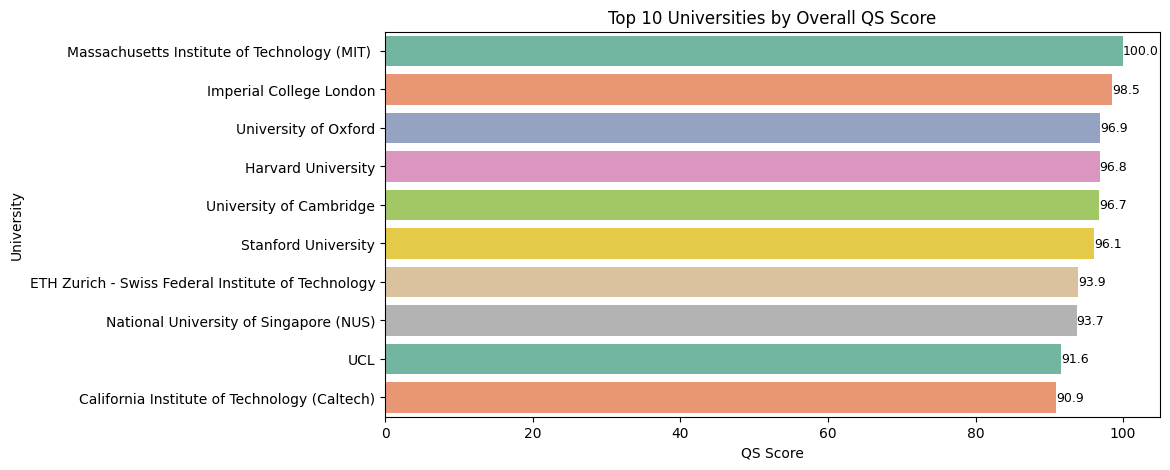

In [36]:
#Lets know what are the top 10 universities based on the Overall QS Score
top_10_universities = df.sort_values('qs_overall_score', ascending=False).head(10)

plt.figure(figsize=(10, 5))
barplt = sns.barplot(y='institution_name', x='qs_overall_score', data=top_10_universities, hue = 'institution_name', palette = 'Set2')

for index, value in enumerate(top_10_universities['qs_overall_score']):
    barplt.text(value, index, round(value, 2), color='black', ha="left", va="center", size  = 9)

plt.xlabel('QS Score')
plt.ylabel('University')
plt.title('Top 10 Universities by Overall QS Score')

plt.show()

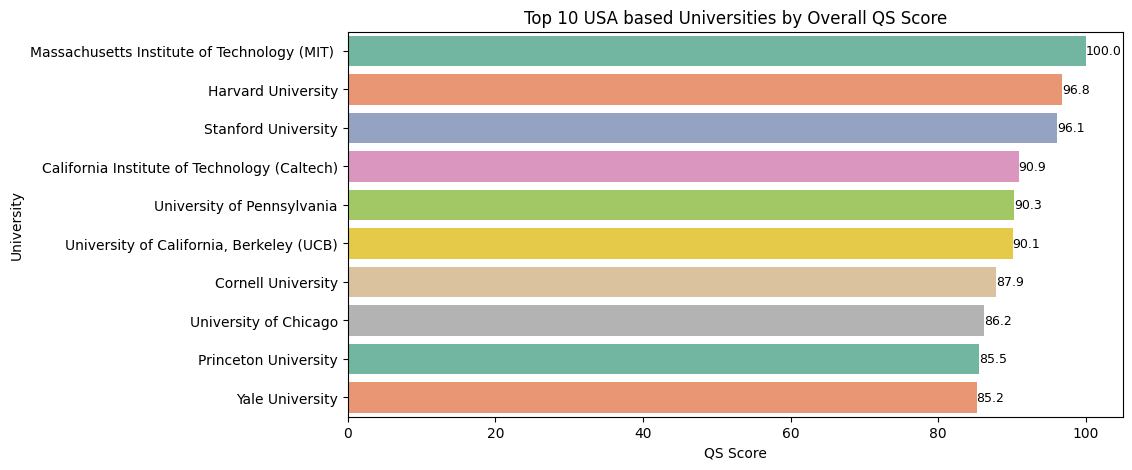

In [118]:
#Lets know what are the top 10 USA based universities based on the Overall QS Score
top_10_universities = df[df['within_us'] == "Yes"].sort_values('qs_overall_score', ascending=False).head(10)

plt.figure(figsize=(10, 5))
barplt = sns.barplot(y='institution_name', x='qs_overall_score', data=top_10_universities, hue = 'institution_name', palette = 'Set2')

for index, value in enumerate(top_10_universities['qs_overall_score']):
    barplt.text(value, index, round(value, 2), color='black', ha="left", va="center", size  = 9)

plt.xlabel('QS Score')
plt.ylabel('University')
plt.title('Top 10 USA based Universities by Overall QS Score')

plt.show()

# Judging universitites based on the location

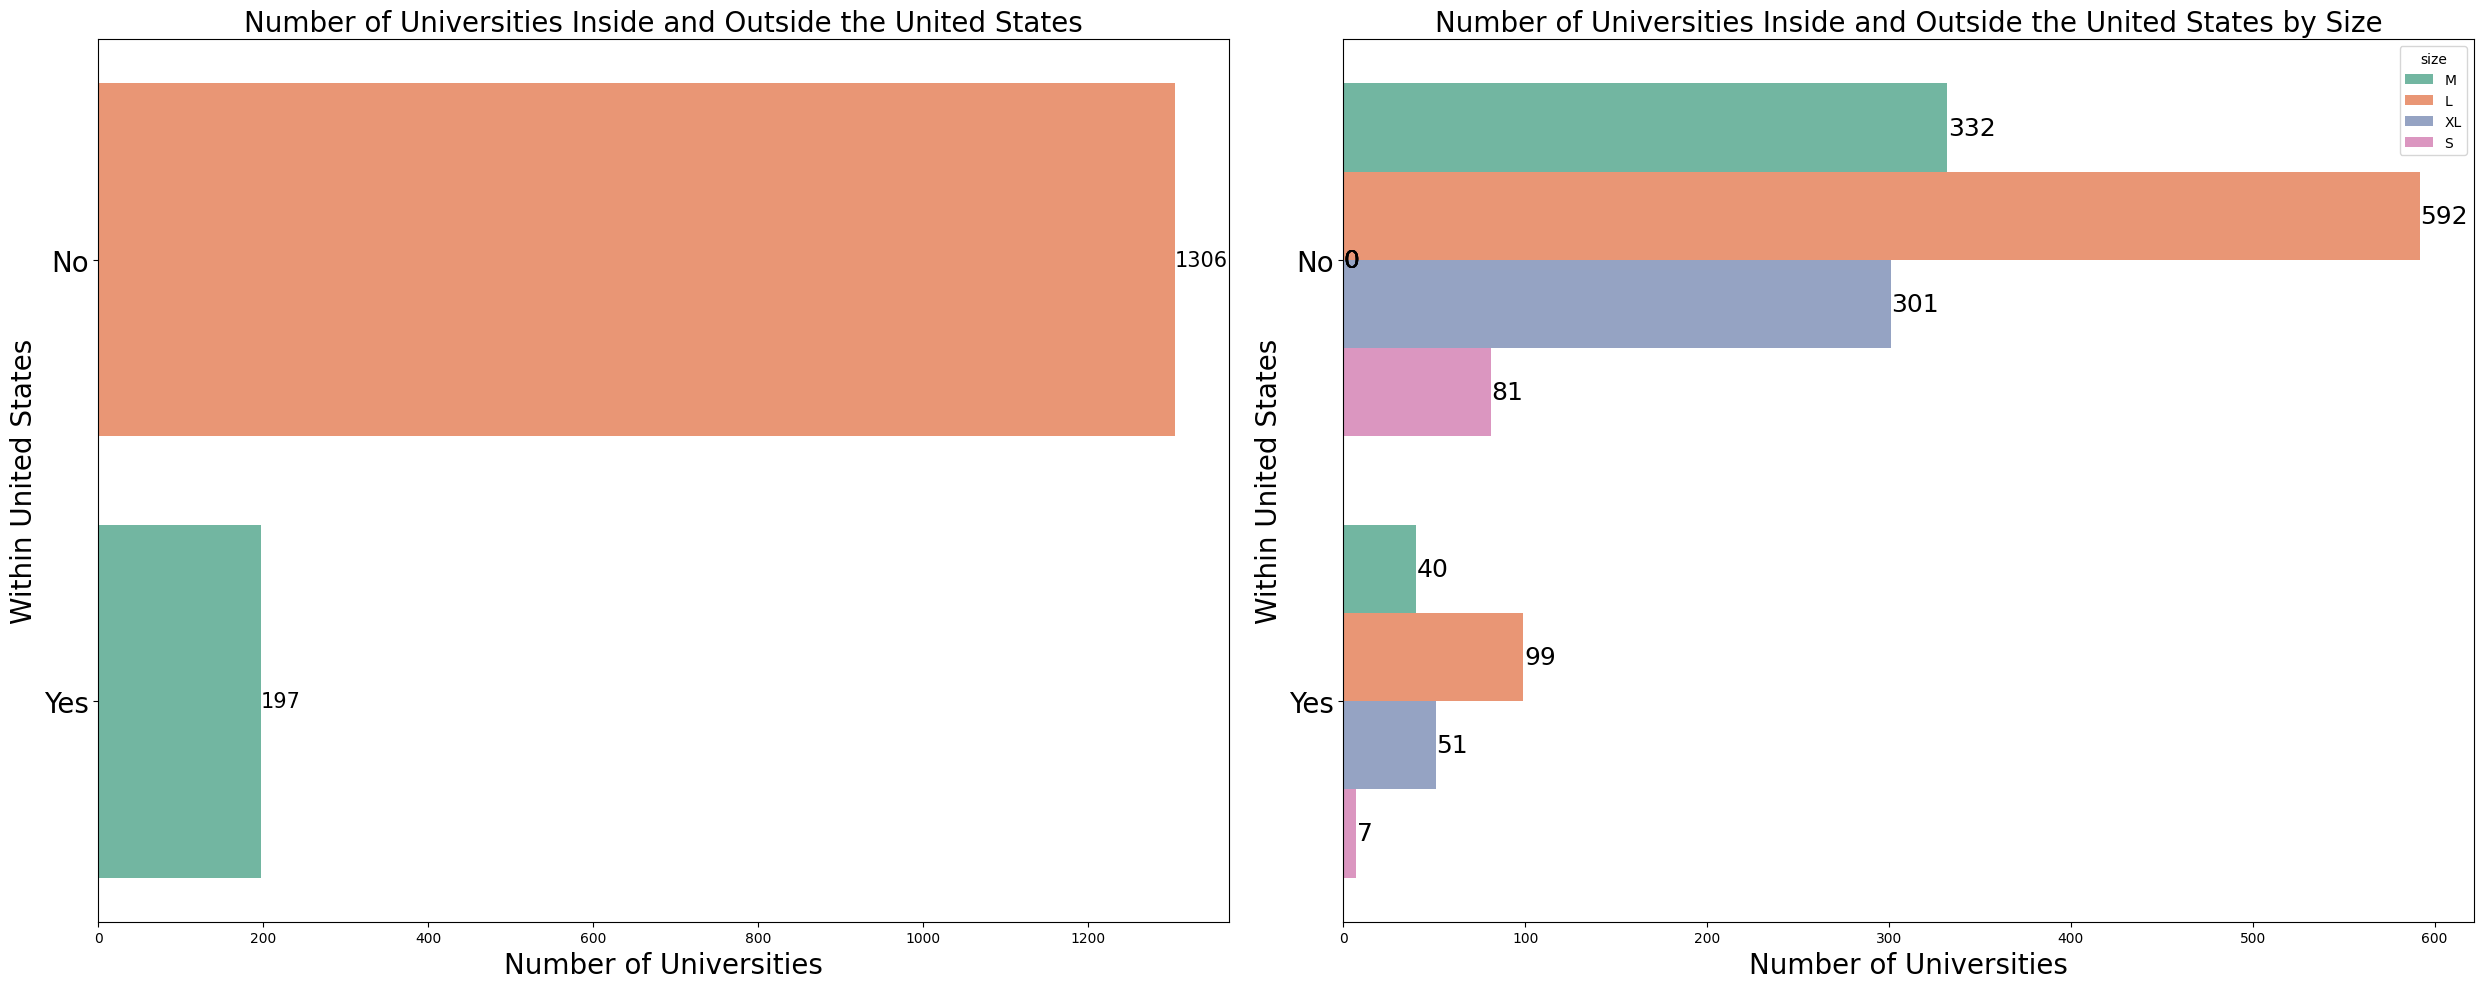

In [119]:
#Number of Universities inside and outside USA
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

ax1 = sns.countplot(ax=axes[0], data=df, y="within_us", order=df['within_us'].value_counts().index, hue = "within_us", palette="Set2")

for p in ax1.patches:
    width = p.get_width()
    ax1.text(width + 0.3, p.get_y() + p.get_height() / 2, int(width), ha='left', va='center', size=15, color='black')

axes[0].tick_params(axis='y', labelsize=20)
axes[0].set_xlabel('Number of Universities', size=20)
axes[0].set_ylabel('Within United States', size=20)
axes[0].set_title('Number of Universities Inside and Outside the United States', size=20)

ax2 = sns.countplot(ax=axes[1], data=df, y="within_us", order=df['within_us'].value_counts().index, hue="size", palette="Set2")

for p in ax2.patches:
    width = p.get_width()
    ax2.text(width + 0.3, p.get_y() + p.get_height() / 2, int(width), ha='left', va='center', size=18, color='black')

axes[1].tick_params(axis='y', labelsize=20)
axes[1].set_xlabel('Number of Universities', size=20)
axes[1].set_ylabel('Within United States', size=20)
axes[1].set_title('Number of Universities Inside and Outside the United States by Size', size=20)

plt.tight_layout()

plt.show()

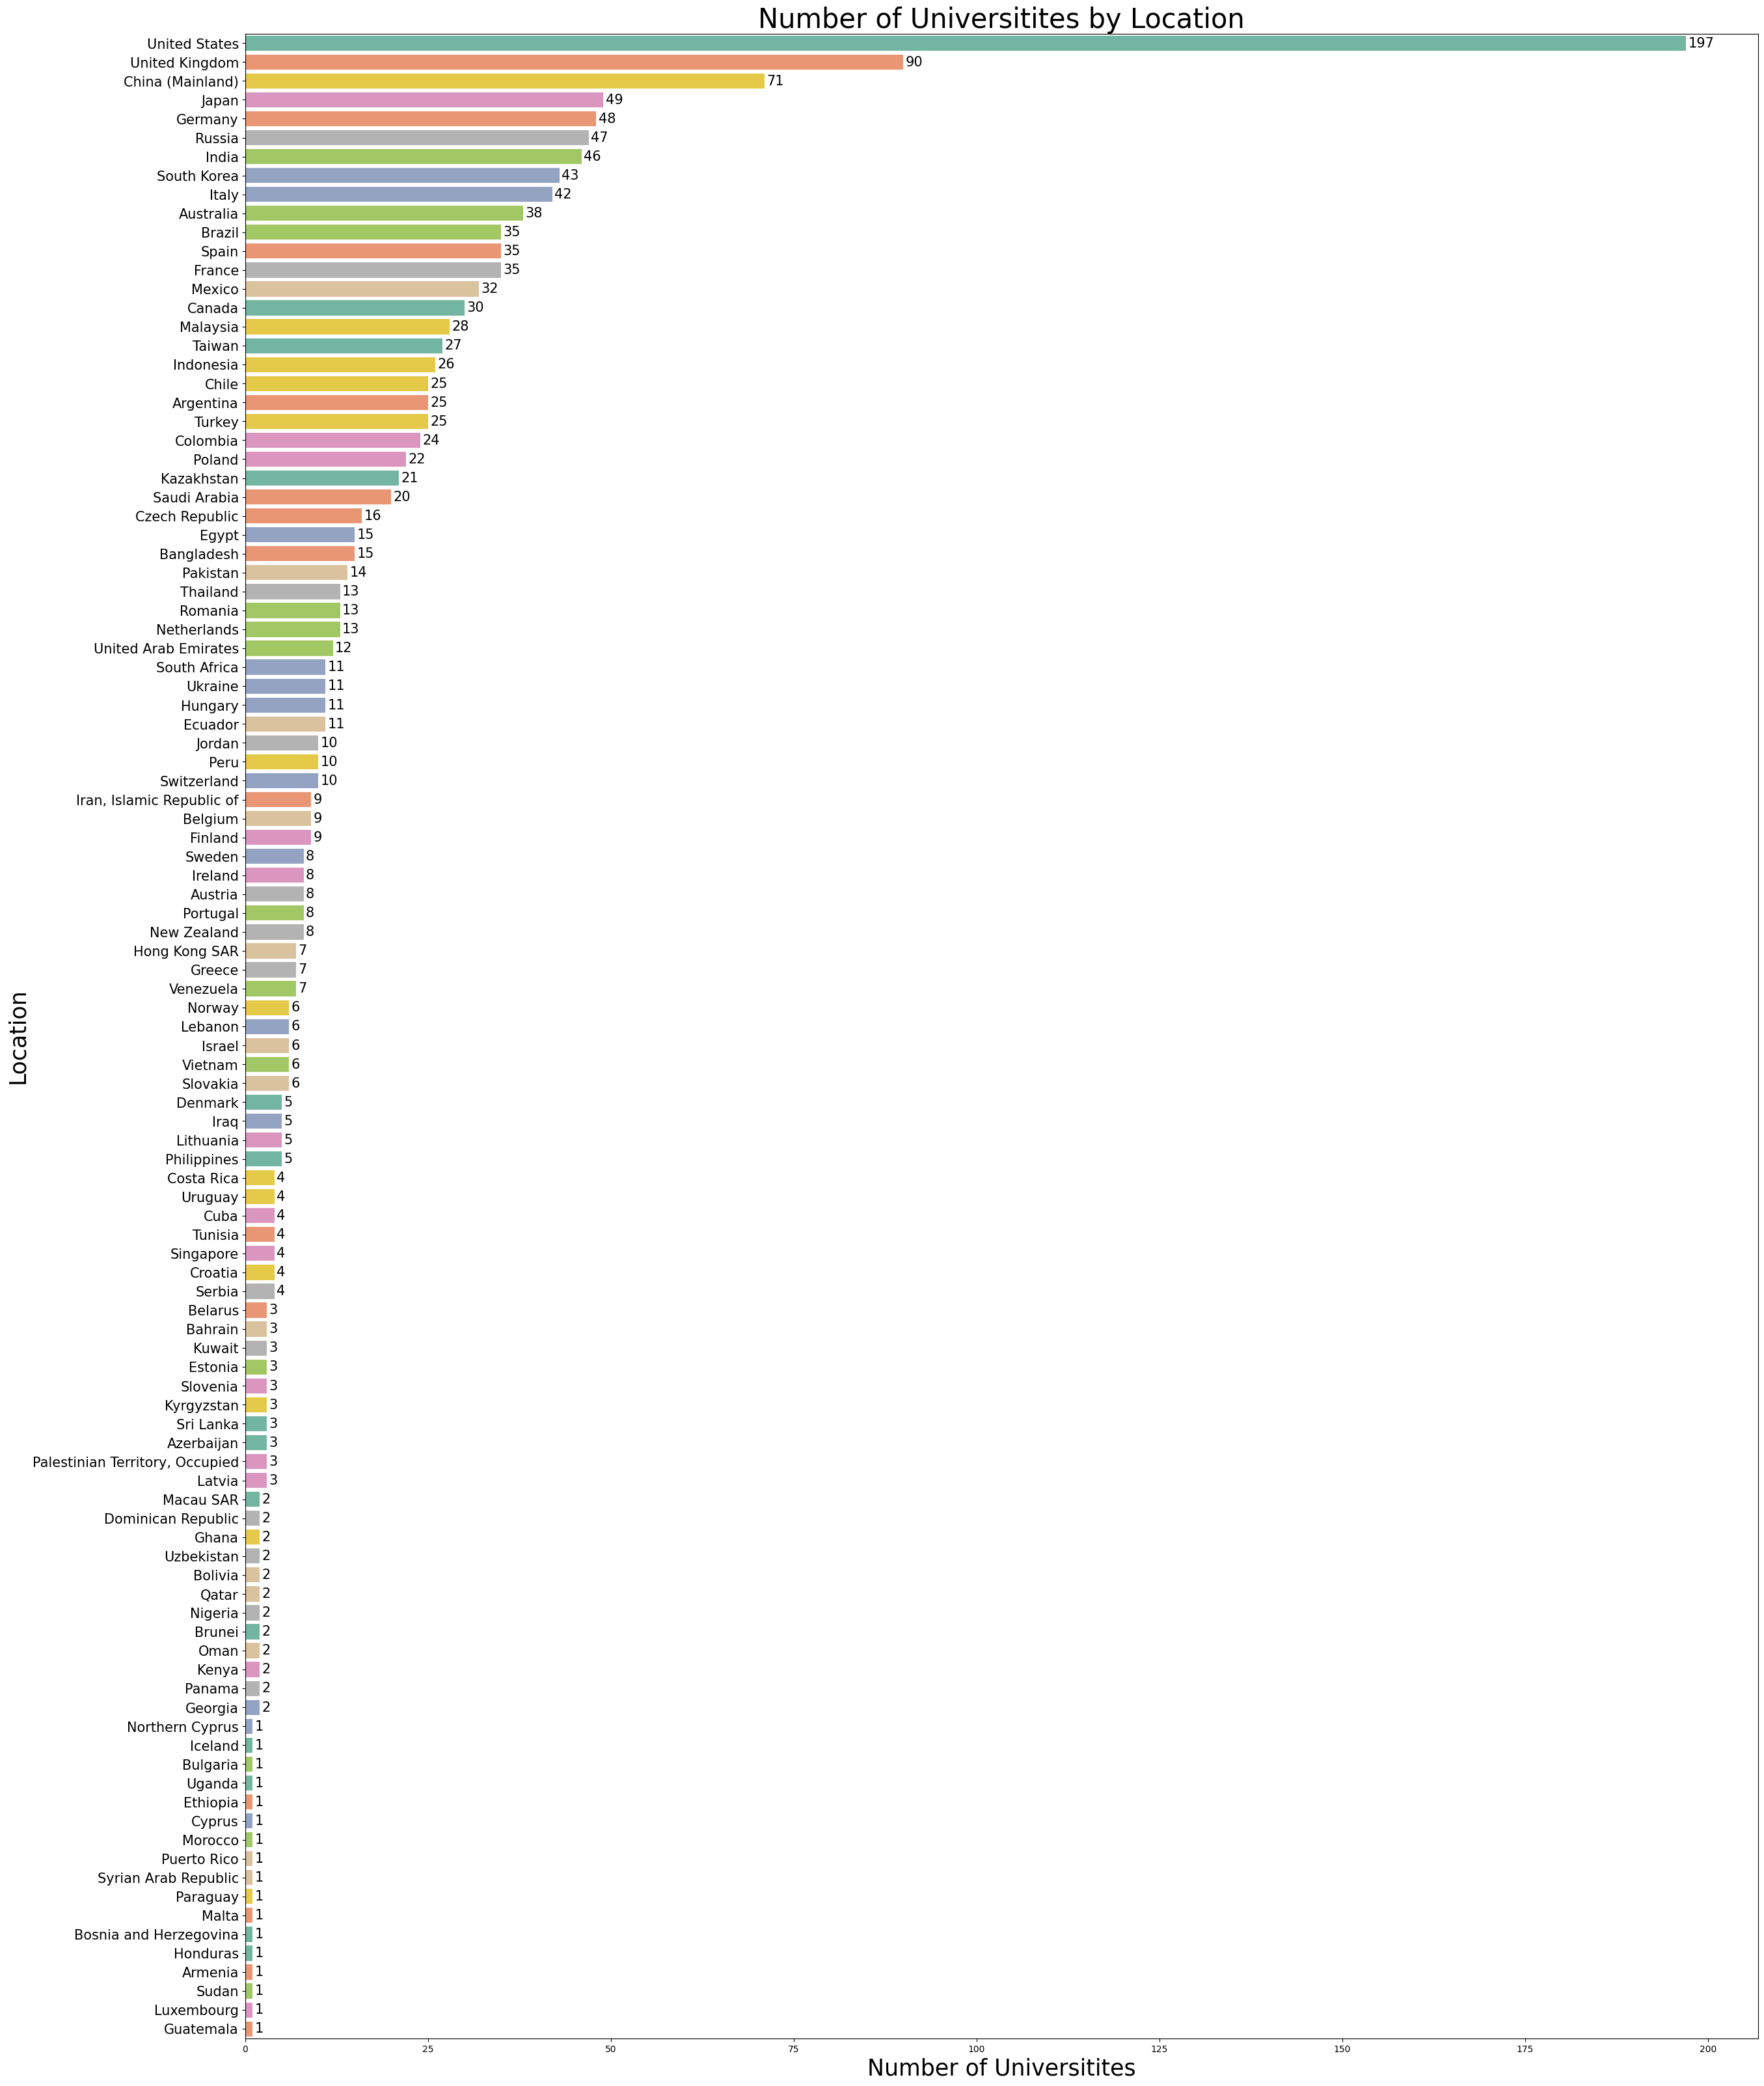

In [120]:
#Number of universities in each location
lt.figure(figsize=(30, 40))
ax = sns.countplot(data=df, y="location_full", order=df['location_full'].value_counts().index, hue = "location_full", palette="Set2")

for p in ax.patches:
    plt.text(p.get_width() + 0.3, p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center', size=15, color='black')

plt.yticks(size=15)
plt.xlabel('Number of Universitites', size=25)
plt.ylabel('Location', size=25)
plt.title('Number of Universitites by Location', size=30)

plt.show()

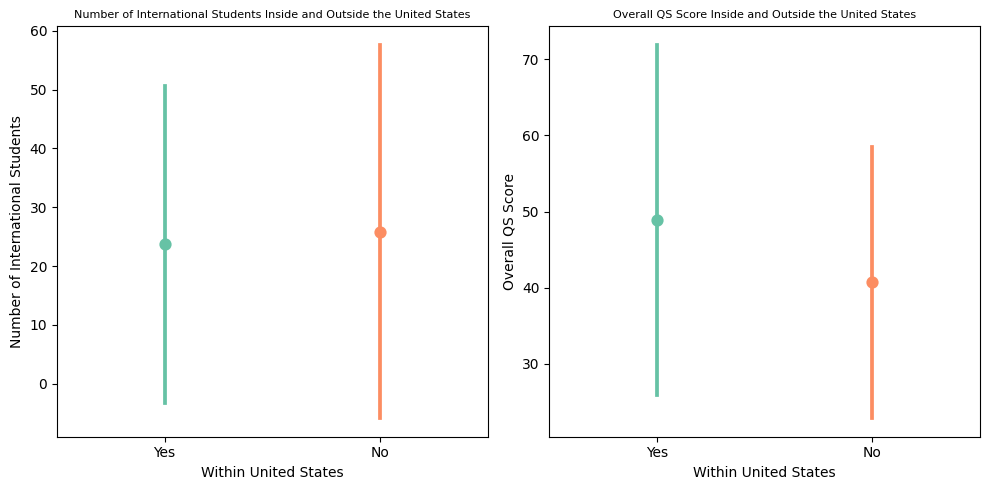

In [121]:
#Average Number of International Students and Average QS Score inside and outside USA
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

ax1 =  sns.pointplot(ax = axes[0], data=df, x="within_us", y="international_students", errorbar="sd", hue="within_us", palette="Set2")
axes[0].set_xlabel('Within United States', size = 10)
axes[0].set_ylabel('Number of International Students', size = 10)
axes[0].set_title('Number of International Students Inside and Outside the United States', size = 8)


ax2 = sns.pointplot(ax = axes[1], data=df, x="within_us", y="qs_overall_score", errorbar="sd", hue="within_us", palette="Set2")
axes[1].set_xlabel('Within United States', size = 10)
axes[1].set_ylabel('Overall QS Score', size = 10)
axes[1].set_title('Overall QS Score Inside and Outside the United States', size = 8)

plt.tight_layout()
plt.show()

# Cultural Impact on universitites from various locations

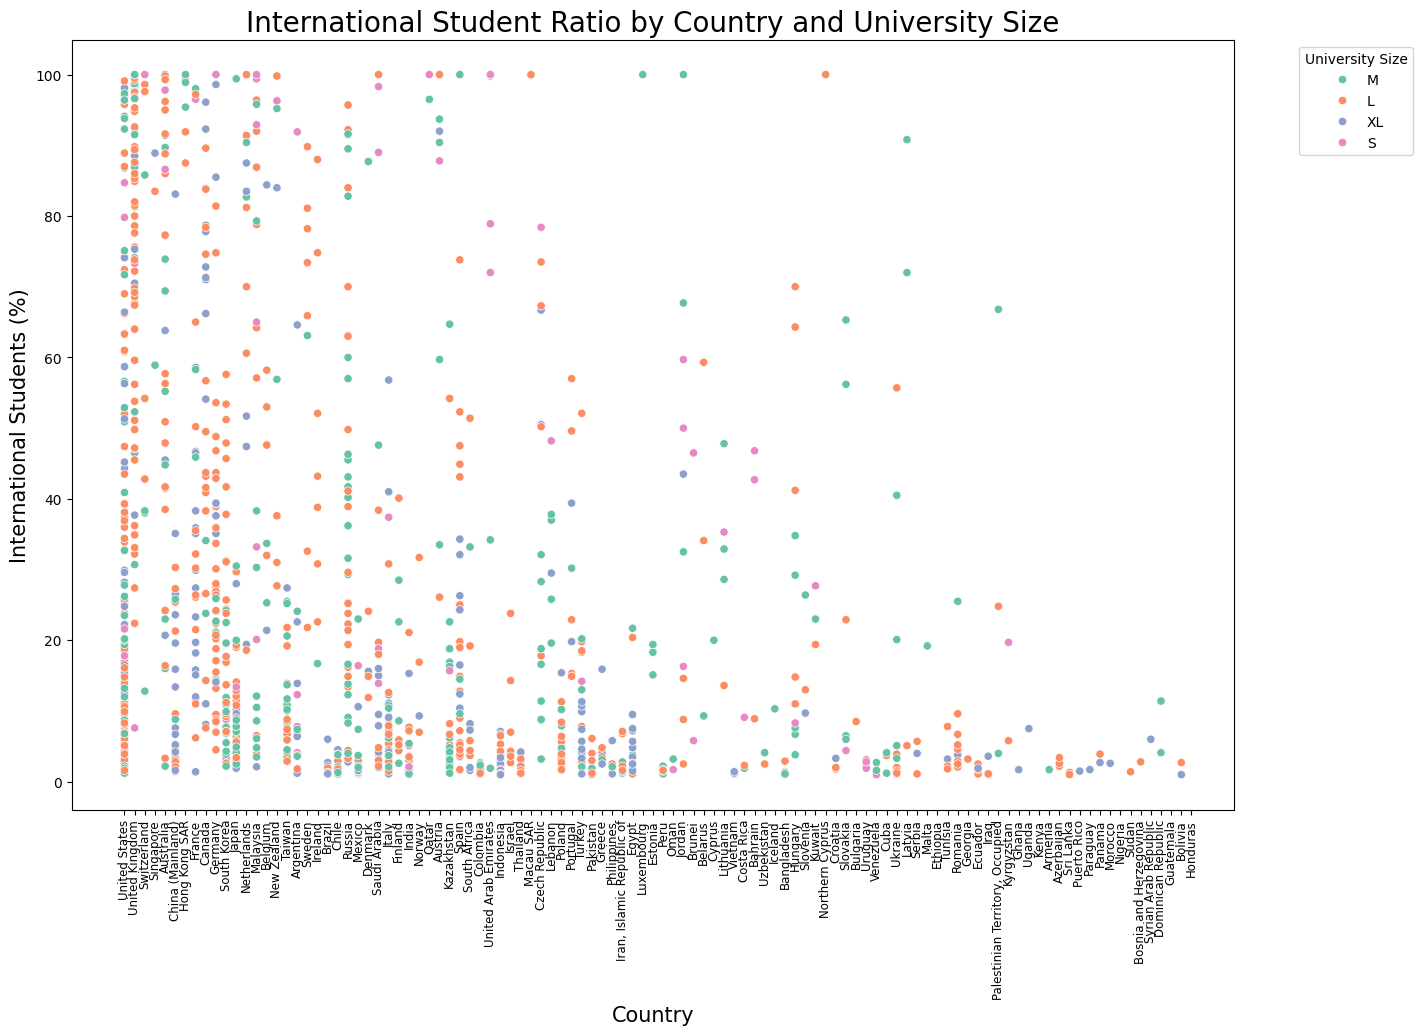

In [41]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='location_full', y='international_students', hue='size', data=df, legend='full', palette='Set2')

plt.title('International Student Ratio by Country and University Size', size = 20)
plt.xlabel('Country', size = 15)
plt.xticks(rotation = 90, size = 8.5)
plt.ylabel('International Students (%)', size = 15)
plt.legend(title='University Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

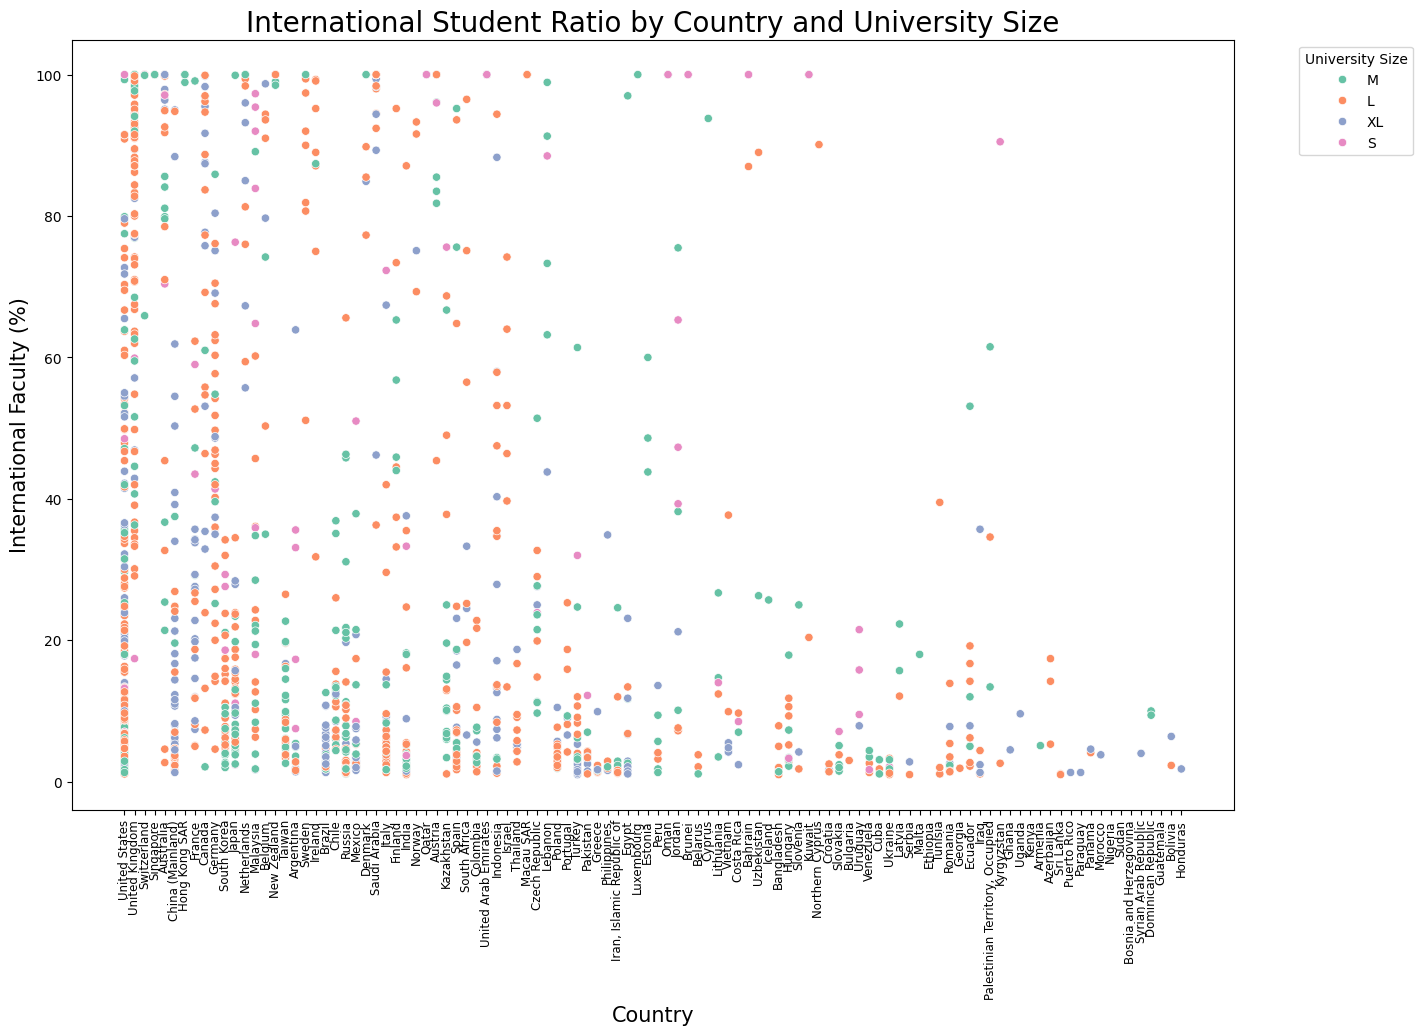

In [42]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='location_full', y='international_faculty', hue='size', data=df, legend='full', palette='Set2')

plt.title('International Student Ratio by Country and University Size', size = 20)
plt.xlabel('Country', size = 15)
plt.xticks(rotation = 90, size = 8.5)
plt.ylabel('International Faculty (%)', size = 15)
plt.legend(title='University Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Employment Scenario in various Universities

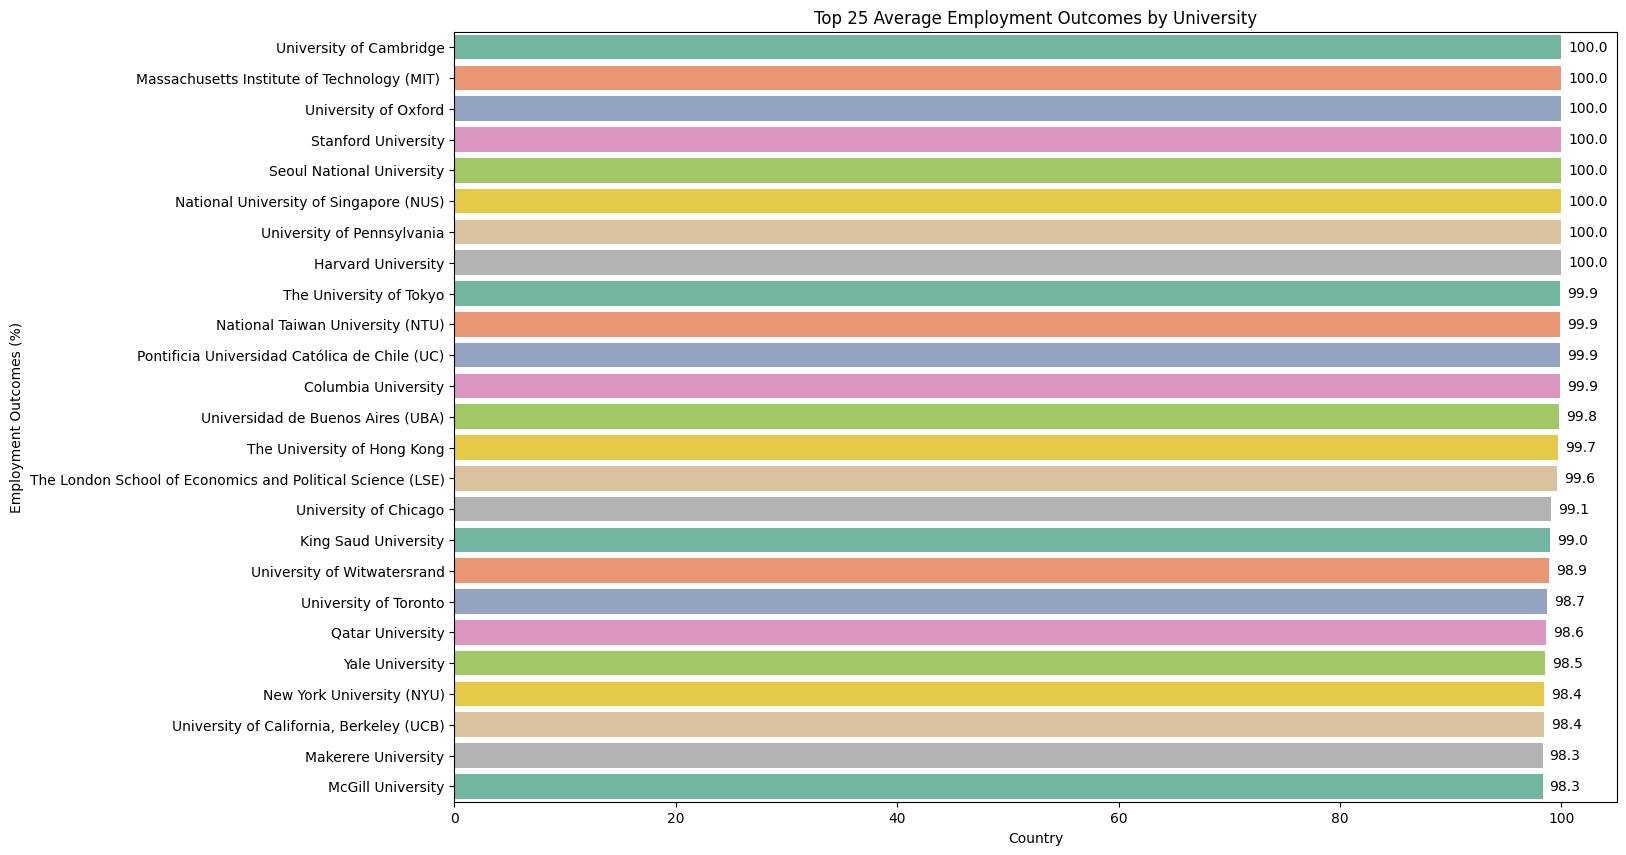

In [131]:
location_employment = df.groupby('institution_name')['employment_outcomes'].mean().reset_index()

location_employment = location_employment.sort_values(by = 'employment_outcomes', ascending = False)

plt.figure(figsize=(15, 10))
ax = sns.barplot(y='institution_name', x='employment_outcomes', data=location_employment.head(25), hue = 'institution_name', palette='Set2')

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.1f}', xy=(width, p.get_y() + p.get_height() / 2), xytext=(5, 0), textcoords='offset points', ha='left', 
                va='center', fontsize=10, color='black')

plt.title('Top 25 Average Employment Outcomes by University')
plt.xlabel('Country')
plt.ylabel('Employment Outcomes (%)')

plt.show()

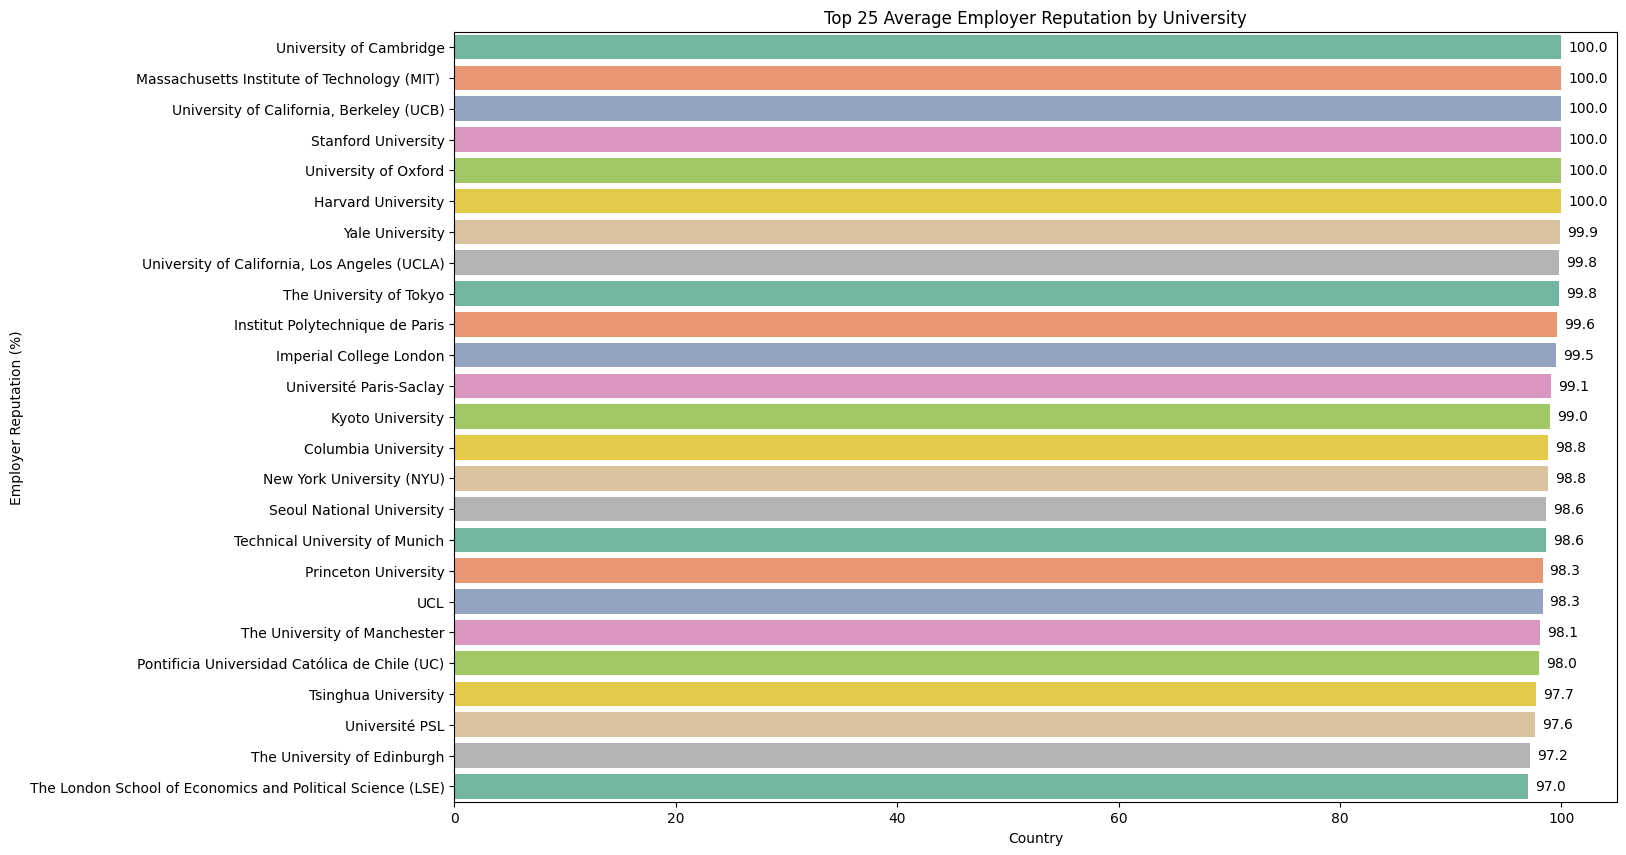

In [132]:
location_employment = df.groupby('institution_name')['employer_reputation'].mean().reset_index()

location_employment = location_employment.sort_values(by = 'employer_reputation', ascending = False)

plt.figure(figsize=(15, 10))
ax = sns.barplot(y='institution_name', x='employer_reputation', data=location_employment.head(25), hue = 'institution_name', palette='Set2')

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.1f}', xy=(width, p.get_y() + p.get_height() / 2), xytext=(5, 0), textcoords='offset points', ha='left', 
                va='center', fontsize=10, color='black')

plt.title('Top 25 Average Employer Reputation by University')
plt.xlabel('Country')
plt.ylabel('Employer Reputation (%)')

plt.show()

# Size and environmental impact 

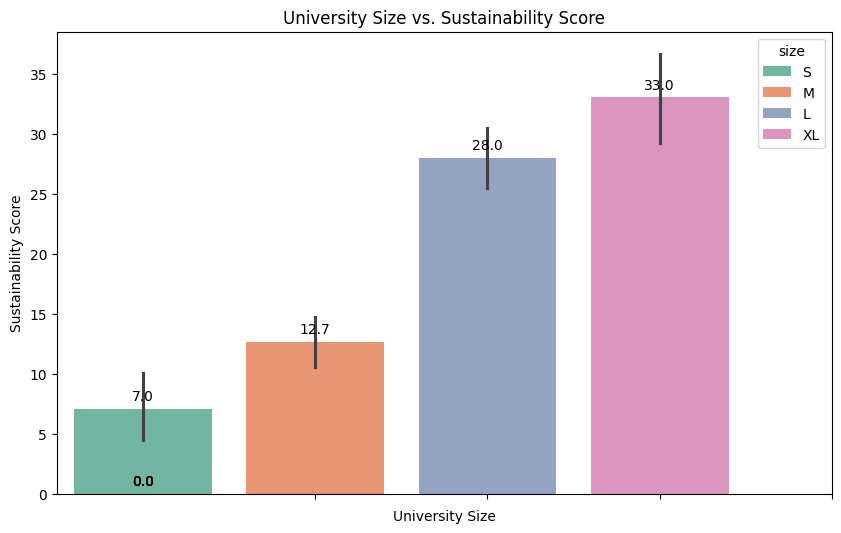

In [44]:
plt.figure(figsize=(10, 6))

size_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4}
df['size_numeric'] = df['size'].map(size_mapping)

ax = sns.barplot(x='size_numeric', y='sustainability', hue='size', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9),
                textcoords = 'offset points', fontsize=10, color='black')

ax.set_xlabel('University Size')
ax.set_ylabel('Sustainability Score')
ax.set_title('University Size vs. Sustainability Score')

size_labels = ['', '', '', '']
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(size_labels)

plt.show()

# Ranking universities based on each metric

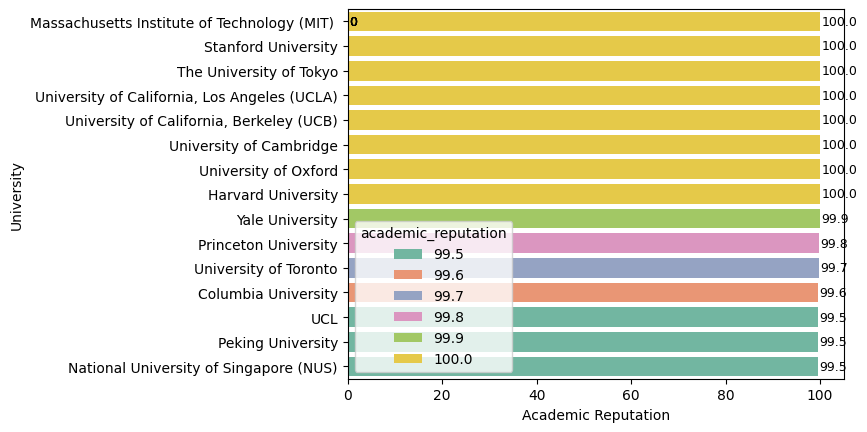

In [106]:
df_sorted = df.sort_values(by='academic_reputation', ascending=False)
    
ax = sns.barplot(y='institution_name', x='academic_reputation', data=df_sorted.head(15), hue = 'academic_reputation', palette = 'Set2')
    
for p in ax.patches:
    ax.text(p.get_width() + 0.3, p.get_y() + p.get_height() / 2, round(p.get_width(), 2), ha='left', va='center', size=9, color='black')
    
ax.set_xlabel('Academic Reputation', size = 10)
ax.set_ylabel('University', size = 10)

plt.show()

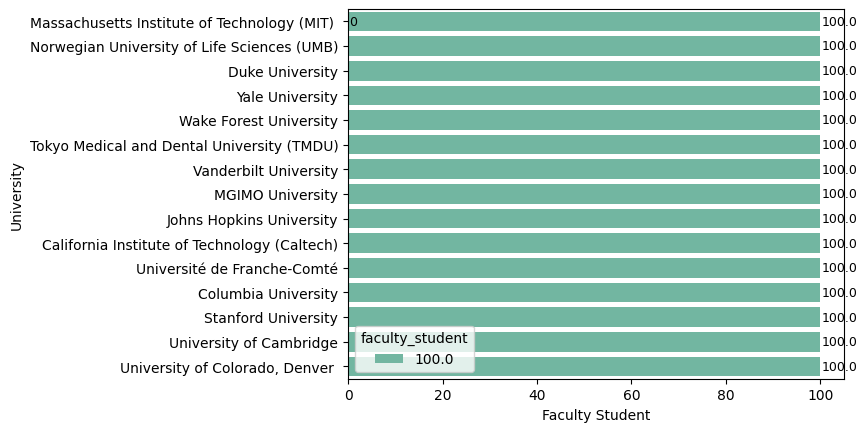

In [108]:
df_sorted = df.sort_values(by='faculty_student', ascending=False)
    
ax = sns.barplot(y='institution_name', x='faculty_student', data=df_sorted.head(15), hue = 'faculty_student', palette = 'Set2')
    
for p in ax.patches:
    ax.text(p.get_width() + 0.3, p.get_y() + p.get_height() / 2, round(p.get_width(), 2), ha='left', va='center', size=9, color='black')
    
ax.set_xlabel('Faculty Student', size = 10)
ax.set_ylabel('University', size = 10)

plt.show()

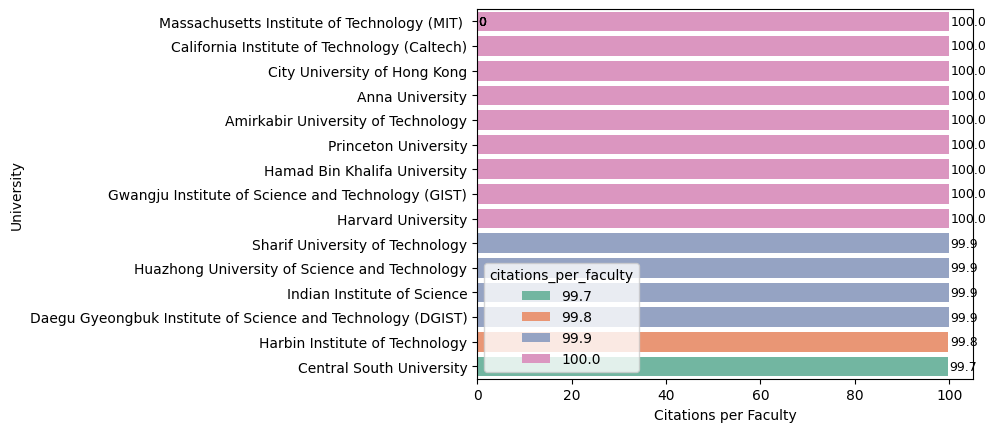

In [109]:
df_sorted = df.sort_values(by='citations_per_faculty', ascending=False)
    
ax = sns.barplot(y='institution_name', x='citations_per_faculty', data=df_sorted.head(15), hue = 'citations_per_faculty', palette = 'Set2')
    
for p in ax.patches:
    ax.text(p.get_width() + 0.3, p.get_y() + p.get_height() / 2, round(p.get_width(), 2), ha='left', va='center', size=9, color='black')
    
ax.set_xlabel('Citations per Faculty', size = 10)
ax.set_ylabel('University', size = 10)

plt.show()

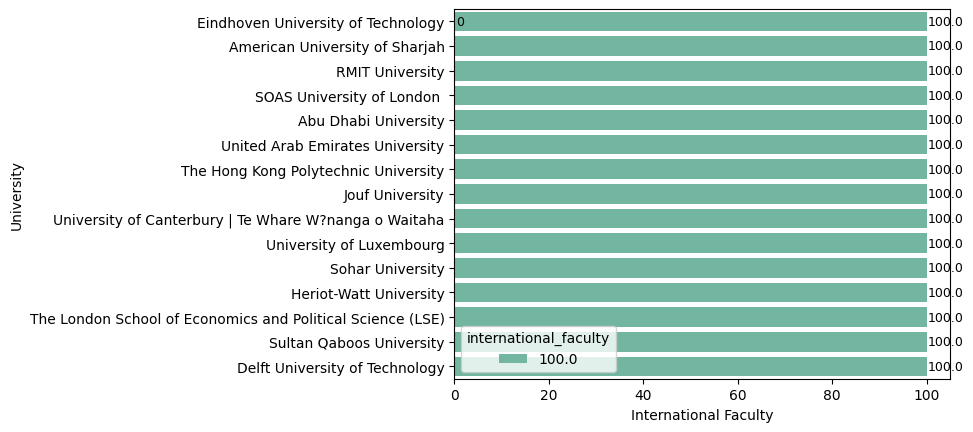

In [110]:
df_sorted = df.sort_values(by='international_faculty', ascending=False)
    
ax = sns.barplot(y='institution_name', x='international_faculty', data=df_sorted.head(15), hue = 'international_faculty', palette = 'Set2')
    
for p in ax.patches:
    ax.text(p.get_width() + 0.3, p.get_y() + p.get_height() / 2, round(p.get_width(), 2), ha='left', va='center', size=9, color='black')
    
ax.set_xlabel('International Faculty', size = 10)
ax.set_ylabel('University', size = 10)

plt.show()

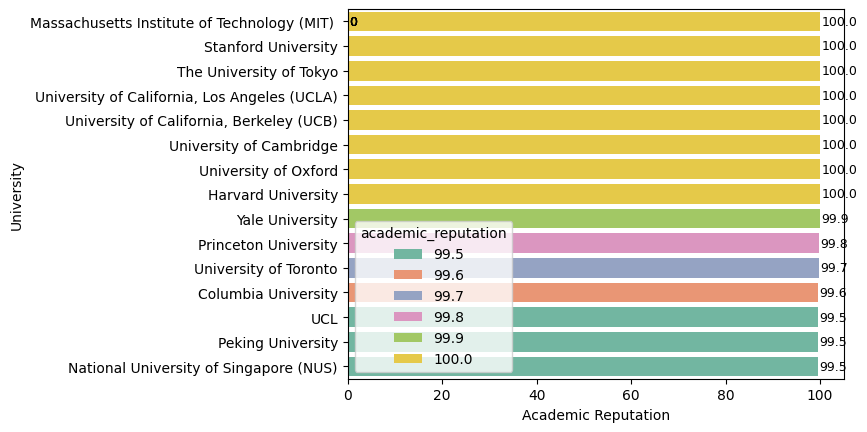

In [106]:
df_sorted = df.sort_values(by='international_students', ascending=False)
    
ax = sns.barplot(y='institution_name', x='international_students', data=df_sorted.head(15), hue = 'international_students', palette = 'Set2')
    
for p in ax.patches:
    ax.text(p.get_width() + 0.3, p.get_y() + p.get_height() / 2, round(p.get_width(), 2), ha='left', va='center', size=9, color='black')
    
ax.set_xlabel('International Students', size = 10)
ax.set_ylabel('University', size = 10)

plt.show()

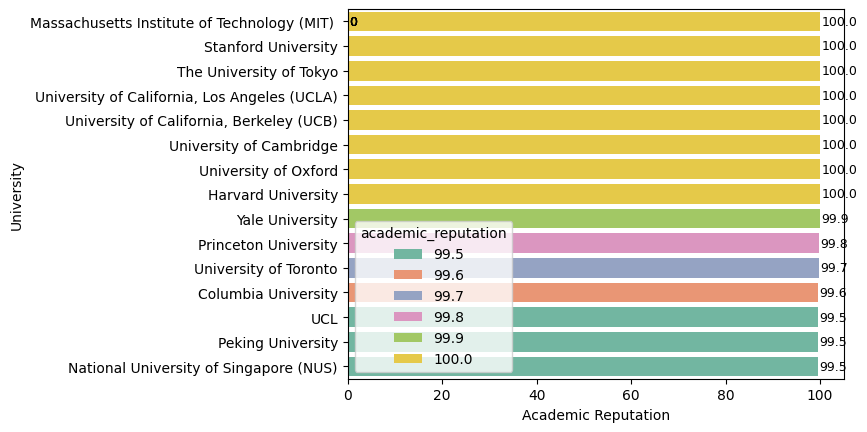

In [106]:
df_sorted = df.sort_values(by='international_research_network', ascending=False)
    
ax = sns.barplot(y='institution_name', x='international_research_network', data=df_sorted.head(15), hue = 'international_research_network', palette = 'Set2')
    
for p in ax.patches:
    ax.text(p.get_width() + 0.3, p.get_y() + p.get_height() / 2, round(p.get_width(), 2), ha='left', va='center', size=9, color='black')
    
ax.set_xlabel('International Research Network', size = 10)
ax.set_ylabel('University', size = 10)

plt.show()

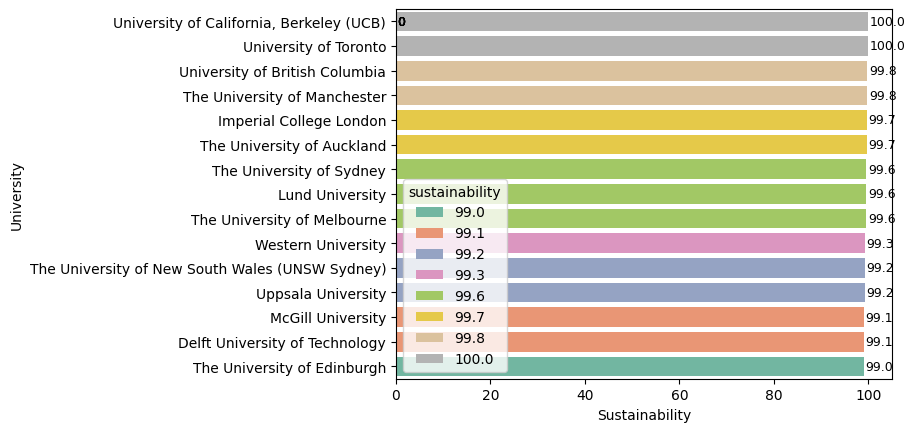

In [112]:
df_sorted = df.sort_values(by='sustainability', ascending=False)
    
ax = sns.barplot(y='institution_name', x='sustainability', data=df_sorted.head(15), hue = 'sustainability', palette = 'Set2')
    
for p in ax.patches:
    ax.text(p.get_width() + 0.3, p.get_y() + p.get_height() / 2, round(p.get_width(), 2), ha='left', va='center', size=9, color='black')
    
ax.set_xlabel('Sustainability', size = 10)
ax.set_ylabel('University', size = 10)

plt.show()

# Relation between various metrics

<Figure size 1000x1000 with 0 Axes>

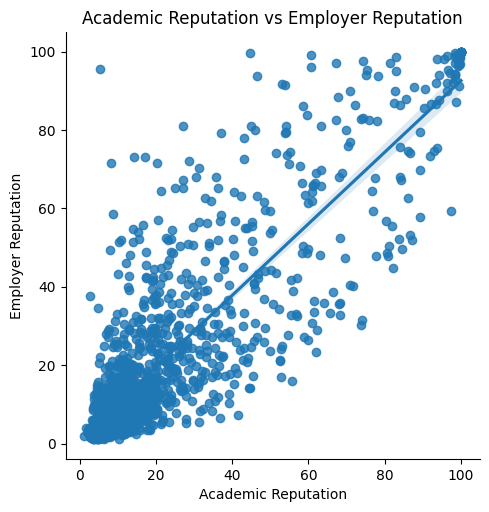

In [23]:
plt.figure(figsize=(10, 10))

sns.lmplot(x='academic_reputation', y='employer_reputation', data=df, palette = "Set2")
plt.xlabel('Academic Reputation')
plt.ylabel('Employer Reputation')
plt.title('Academic Reputation vs Employer Reputation')

plt.show()

<Figure size 1000x1000 with 0 Axes>

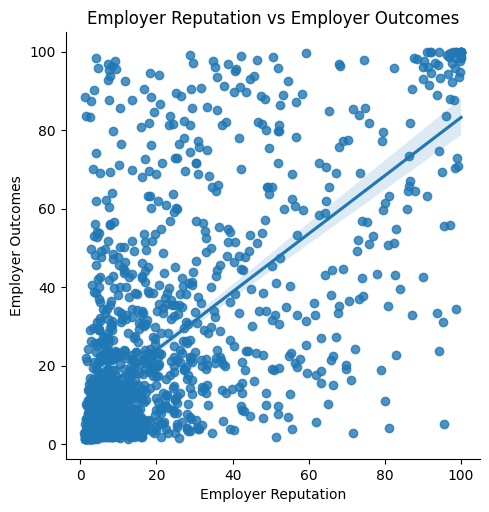

In [114]:
plt.figure(figsize=(10, 10))

sns.lmplot(x='employer_reputation', y='employment_outcomes', data=df, palette = "Set2")
plt.xlabel('Employer Reputation')
plt.ylabel('Employer Outcomes')
plt.title('Employer Reputation vs Employer Outcomes')

plt.show()

<Figure size 1000x1000 with 0 Axes>

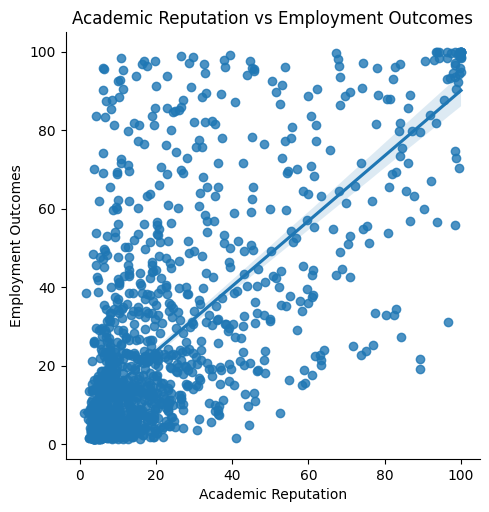

In [116]:
plt.figure(figsize=(10, 10))

sns.lmplot(x='academic_reputation', y='employment_outcomes', data=df, palette = "Set2")
plt.xlabel('Academic Reputation')
plt.ylabel('Employment Outcomes')
plt.title('Academic Reputation vs Employment Outcomes')

plt.show()

# Correlation Matrix between metrices

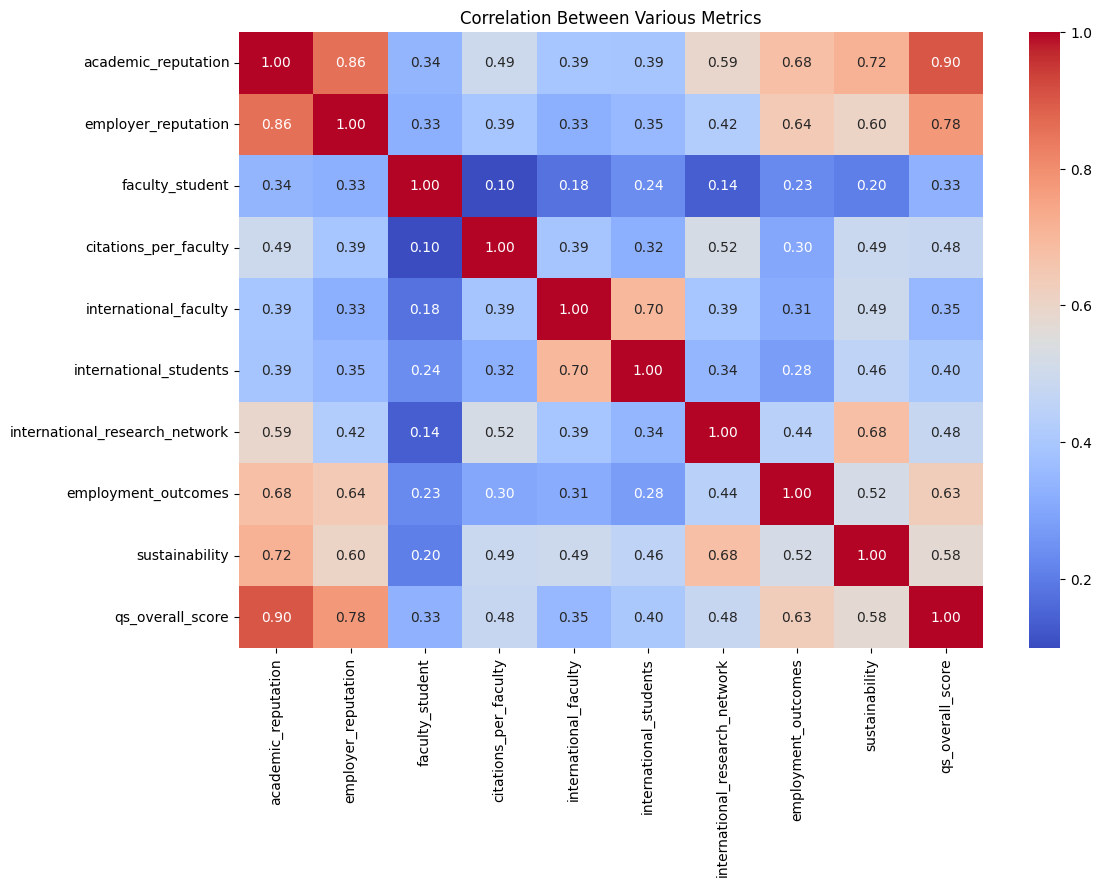

In [25]:
#Understanding the correlation between various metrics
metrics = df[['academic_reputation', 'employer_reputation', 'faculty_student', 'citations_per_faculty',
              'international_faculty', 'international_students', 'international_research_network',
              'employment_outcomes', 'sustainability', 'qs_overall_score']]

corr_matrix = metrics.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Various Metrics')
plt.show()

# Overall QS Score based on location

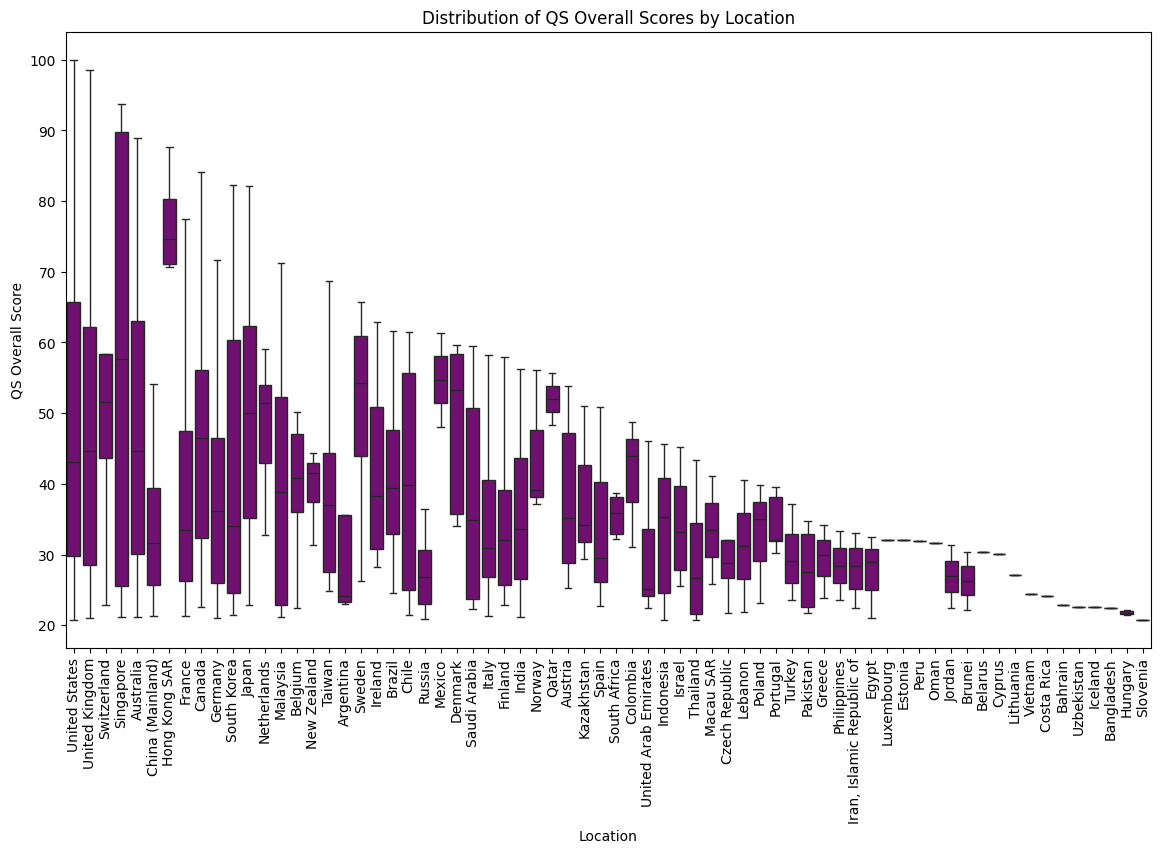

In [26]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='location_full', y='qs_overall_score', data=df[~df['qs_overall_score'].isna()], showfliers=False, color = 'purple')

plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('QS Overall Score')
plt.title('Distribution of QS Overall Scores by Location')
plt.show()